In [6]:
# Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

from scikitplot.metrics import plot_lift_curve

In [7]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('scaled_datatest2copy.csv')

    class_name = "Occupancy"

    attributes = [col for col in df.columns if col != class_name]
    X = df[attributes].values
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[attributes].values
    y_test1 = df_test1[class_name]


    attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[attributes].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [8]:
#create a function that load all our datasets and prrepare them 

In [9]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [(X_test,y_test),(X_test1,y_test1),
         (X_test2,y_test2)]


In [10]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

# Gaussian

In [8]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
def show_report(tests):
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for ================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plot_lift_curve(results, y_score)

        plt.show()


 ===============Results for ================== 

Accuracy 0.9905853458862055
F1-score [0.99399007 0.9782814 ]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      1.00      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



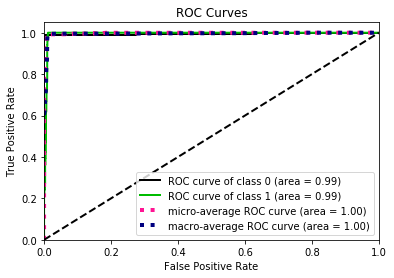

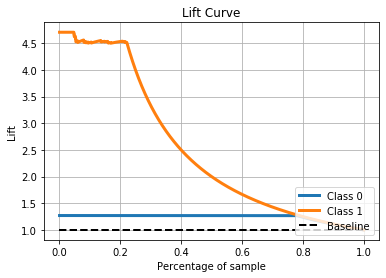


 ===============Results for ================== 

Accuracy 0.9579737335834897
F1-score [0.96711685 0.94178794]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1693
           1       0.95      0.93      0.94       972

    accuracy                           0.96      2665
   macro avg       0.96      0.95      0.95      2665
weighted avg       0.96      0.96      0.96      2665



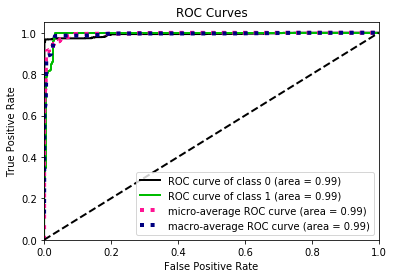

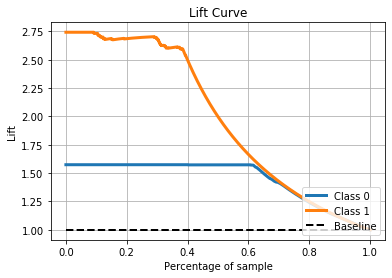


 ===============Results for ================== 

Accuracy 0.986771944216571
F1-score [0.99156587 0.96935139]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7703
           1       0.94      1.00      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.99      0.98      9752
weighted avg       0.99      0.99      0.99      9752



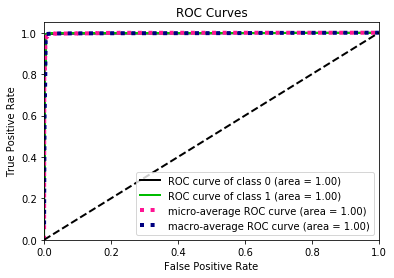

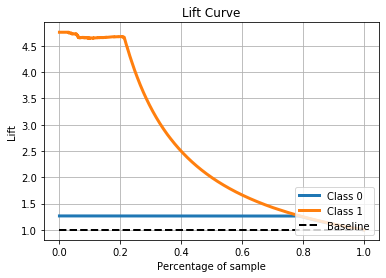

In [10]:
show_report(tests)

In [11]:
df_report = pd.DataFrame()

for test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score      support
0              0.999475  0.988565  0.993990  1924.000000
1              0.959259  0.998073  0.978281   519.000000
accuracy       0.990585  0.990585  0.990585     0.990585
macro avg      0.979367  0.993319  0.986136  2443.000000
weighted avg   0.990931  0.990585  0.990653  2443.000000
              precision    recall  f1-score      support
0              0.961471  0.972829  0.967117  1693.000000
1              0.951681  0.932099  0.941788   972.000000
accuracy       0.957974  0.957974  0.957974     0.957974
macro avg      0.956576  0.952464  0.954452  2665.000000
weighted avg   0.957900  0.957974  0.957879  2665.000000
              precision    recall  f1-score      support
0              0.998815  0.984422  0.991566  7703.000000
1              0.944444  0.995608  0.969351  2049.000000
accuracy       0.986772  0.986772  0.986772     0.986772
macro avg      0.971629  0.990015  0.980459  9752.000000
weighted avg   0.987391  0.9867

In [12]:
df_report

,precision,recall,f1-score,support,precision,recall,f1-score,support,precision,recall,f1-score,support
0,0.999475,0.988565,0.993990,1924.000000,0.961471,0.972829,0.967117,1693.000000,0.998815,0.984422,0.991566,7703.000000
1,0.959259,0.998073,0.978281,519.000000,0.951681,0.932099,0.941788,972.000000,0.944444,0.995608,0.969351,2049.000000
accuracy,0.990585,0.990585,0.990585,0.990585,0.957974,0.957974,0.957974,0.957974,0.986772,0.986772,0.986772,0.986772
macro avg,0.979367,0.993319,0.986136,2443.000000,0.956576,0.952464,0.954452,2665.000000,0.971629,0.990015,0.980459,9752.000000
weighted avg,0.990931,0.990585,0.990653,2443.000000,0.957900,0.957974,0.957879,2665.000000,0.987391,0.986772,0.986898,9752.000000


In [28]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('preprocessdatatrainingcopy.csv')
    df_test1 = pd.read_csv('preprocessdatatestcopy.csv')
    df_test2 = pd.read_csv('preprocessdatatest2copy.csv')

    class_name = "Occupancy"

    attributes = [col for col in df.columns if col != class_name]
    X = df[attributes].values
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[attributes].values
    y_test1 = df_test1[class_name]


    attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[attributes].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [29]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [(X_test,y_test),(X_test1,y_test1),
         (X_test2,y_test2)]

In [30]:
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
y_pred = clf.predict(X_train)
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9826315789473684
F1-score [0.98893484 0.95964126]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4490
           1       0.95      0.97      0.96      1210

    accuracy                           0.98      5700
   macro avg       0.97      0.98      0.97      5700
weighted avg       0.98      0.98      0.98      5700



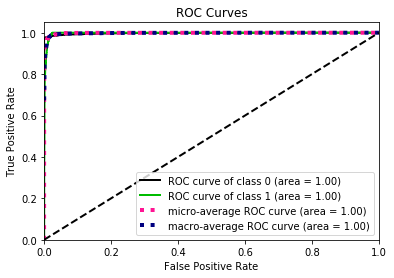

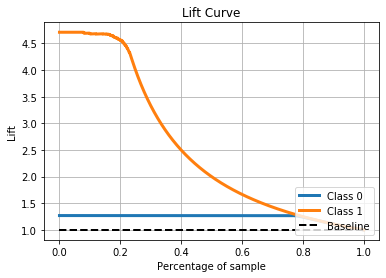

In [32]:

y_pred = clf.predict(X_train)
y_score = clf.predict_proba(X_train)
plot_roc(y_train, y_score)
plot_lift_curve(y_train, y_score)
plt.show()

In [33]:
clf = CategoricalNB()
clf.fit(X_test1, y_test1)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
y_pred = clf.predict(X_test1)
print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

Accuracy 0.9444652908067542
F1-score [0.95652174 0.9231568 ]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1693
           1       0.93      0.91      0.92       972

    accuracy                           0.94      2665
   macro avg       0.94      0.94      0.94      2665
weighted avg       0.94      0.94      0.94      2665



In [36]:
df_report = pd.DataFrame()
y_pred = clf.predict(X_test1)
results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
print(results.T)
df_report = pd.concat([df_report, results.T], axis=1 )

IndexError: index 37 is out of bounds for axis 1 with size 32

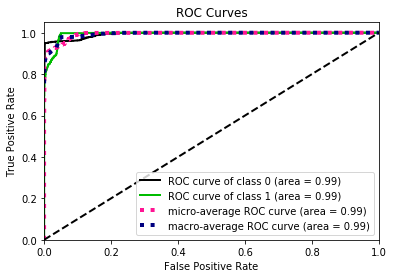

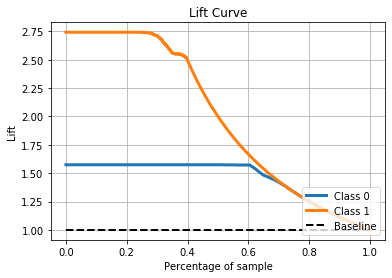

In [20]:
y_pred = clf.predict(X_test1)
y_score = clf.predict_proba(X_test1)
plot_roc(y_test1, y_score)
plot_lift_curve(y_test1, y_score)
plt.show()

In [21]:
clf = CategoricalNB()
clf.fit(X_test2, y_test2)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred = clf.predict(X_test2)
print('Accuracy %s' % accuracy_score(y_test2, y_pred))
print('F1-score %s' % f1_score(y_test2, y_pred, average=None))
print(classification_report(y_test2, y_pred))

Accuracy 0.9856439704675964
F1-score [0.99088067 0.96628131]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



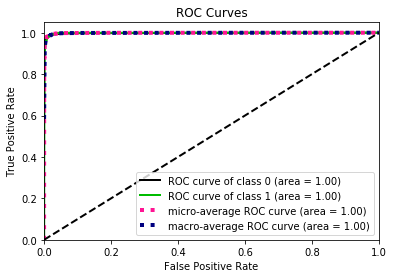

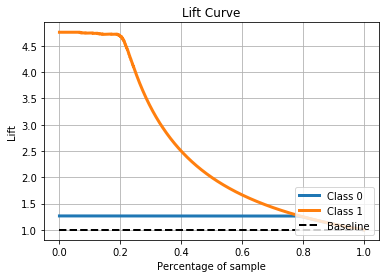

In [50]:


y_pred = clf.predict(X_test2)
y_score = clf.predict_proba(X_test2)
plot_roc(y_test2, y_score)
plot_lift_curve(y_test2, y_score)
plt.show()